In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings ('ignore')

In [2]:
accident = pd.read_csv('datasets\\accident_data.csv')

In [3]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [4]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [5]:
accident.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitude,660654.0,52.553866,1.406922,49.914430,51.490690,52.315641,53.453452,60.757544
Longitude,660653.0,-1.431210,1.383330,-7.516225,-2.332291,-1.411667,-0.232869,1.762010
Number_of_Casualties,660679.0,1.357040,0.824847,1.000000,1.000000,1.000000,1.000000,68.000000
Number_of_Vehicles,660679.0,1.831255,0.715269,1.000000,1.000000,2.000000,2.000000,32.000000


In [6]:
accident.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [7]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'] , dayfirst = True, errors = 'coerce')

In [8]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,NaT,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,NaT,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,NaT,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,NaT,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,NaT,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,NaT,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [9]:
accident['Light_Conditions'] = accident['Light_Conditions'].astype('category')
accident['District Area'] = accident['District Area'].astype('category')
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].astype('category')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].astype('category')
accident['Vehicle_Type'] = accident['Vehicle_Type'].astype('category')

In [10]:
accident.dtypes

Index                              object
Accident_Severity                  object
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                 category
District Area                    category
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                          object
Urban_or_Rural_Area              category
Weather_Conditions                 object
Vehicle_Type                     category
dtype: object

In [11]:
accident['Weather_Conditions'] = accident['Weather_Conditions'].astype('category')
accident['Road_Type'] = accident['Road_Type'].astype('category')

In [12]:
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mode())

In [13]:
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mode())
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna(accident['Road_Surface_Conditions'].mode())

In [14]:
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna(accident['Road_Surface_Conditions'].mode()[0])

In [15]:
accident.isnull().sum()

Index                           0
Accident_Severity               0
Accident Date              395672
Latitude                       25
Light_Conditions                0
District Area                   0
Longitude                      26
Number_of_Casualties            0
Number_of_Vehicles              0
Road_Surface_Conditions         0
Road_Type                    4520
Urban_or_Rural_Area             0
Weather_Conditions          14128
Vehicle_Type                    0
dtype: int64

In [16]:
accident['Urban_or_Rural_Area'].mode()

0    Urban
Name: Urban_or_Rural_Area, dtype: category
Categories (3, object): ['Rural', 'Unallocated', 'Urban']

In [17]:
accident[accident['District Area'] == 'Kensington and Chelsea'].count()

Index                      2799
Accident_Severity          2799
Accident Date              1130
Latitude                   2799
Light_Conditions           2799
District Area              2799
Longitude                  2799
Number_of_Casualties       2799
Number_of_Vehicles         2799
Road_Surface_Conditions    2799
Road_Type                  2796
Urban_or_Rural_Area        2799
Weather_Conditions         2797
Vehicle_Type               2799
dtype: int64

In [18]:
accident_agg = accident.groupby(['District Area']).size()

In [19]:
accident_agg

District Area
Aberdeen City    1323
Aberdeenshire    1930
Adur              619
Allerdale        1128
Alnwick           232
                 ... 
Wychavon         1361
Wycombe          1729
Wyre             1238
Wyre Forest       969
York             1897
Length: 422, dtype: int64

In [20]:
accident['Year'] = accident['Accident Date'].dt.year
accident['Month'] = accident['Accident Date'].dt.month
accident['Day'] = accident['Accident Date'].dt.day
accident['DayOfWeek'] = accident['Accident Date'].dt.dayofweek 

In [21]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019.0,6.0,5.0,2.0
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019.0,7.0,2.0,1.0
2,200701BS66127,Serious,NaT,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car,NaN,NaN,NaN,NaN
3,200701BS66128,Serious,NaT,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),NaN,NaN,NaN,NaN
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle,2019.0,9.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,NaT,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car,NaN,NaN,NaN,NaN
660675,201091NM01881,Slight,NaT,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,NaN,NaN,NaN,NaN
660676,201091NM01935,Slight,NaT,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,NaN,NaN,NaN,NaN
660677,201091NM01964,Serious,NaT,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc,NaN,NaN,NaN,NaN


In [55]:
acci_2019 = accident[accident['Year'] == 2019]
acci_2021 = accident[accident['Year'] == 2021]
acci_2022 = accident[accident['Year'] == 2022]

<h1>UniVariate</h1>
<h2>Question 1</h2>
<h3>How many accidents happen in 2020</h3>

In [23]:
acci_2020 = accident[accident['Year'] == 2020]
acci_2020

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
182120,200801BS70001,Serious,2020-01-02,51.491521,Darkness - lights lit,Kensington and Chelsea,-0.179406,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2020.0,1.0,2.0,3.0
182121,200801BS70002,Slight,2020-01-06,51.484909,Darkness - lights lit,Kensington and Chelsea,-0.176356,1,2,Wet or damp,Single carriageway,Urban,Fine no high winds,Motorcycle over 500cc,2020.0,1.0,6.0,0.0
182122,200801BS70003,Serious,2020-01-12,51.509965,Daylight,Kensington and Chelsea,-0.197405,1,1,Dry,Single carriageway,Urban,Fine no high winds,Car,2020.0,1.0,12.0,6.0
182123,200801BS70004,Slight,2020-01-05,51.490631,Darkness - lights lit,Kensington and Chelsea,-0.185779,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2020.0,1.0,5.0,6.0
182124,200801BS70005,Slight,2020-01-03,51.509712,Darkness - lights lit,Kensington and Chelsea,-0.192659,3,1,Dry,Single carriageway,Urban,Fine no high winds,Car,2020.0,1.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352694,2.01E+12,Slight,2020-11-01,55.267100,Darkness - no lighting,Dumfries and Galloway,-2.959324,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2020.0,11.0,1.0,6.0
352695,2.01E+12,Slight,2020-11-02,54.985218,Daylight,Dumfries and Galloway,-3.278743,1,1,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle 125cc and under,2020.0,11.0,2.0,0.0
352696,2.01E+12,Slight,2020-11-06,55.126057,Darkness - no lighting,Dumfries and Galloway,-3.344404,1,1,Wet or damp,Single carriageway,Rural,Fine no high winds,Car,2020.0,11.0,6.0,4.0
352697,2.01E+12,Serious,2020-11-04,55.243971,Darkness - no lighting,Dumfries and Galloway,-3.461163,2,2,Dry,Single carriageway,Rural,Fine no high winds,Car,2020.0,11.0,4.0,2.0


In [24]:
acci_2020['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       51605
Darkness - lights lit          13467
Darkness - no lighting          4085
Darkness - lighting unknown      717
Darkness - lights unlit          289
Name: count, dtype: int64

In [25]:
acci_2020['Light_Conditions'].value_counts().sum()

np.int64(70163)

<h1>Insight 1 =There are 70,163 accidents happen in 2020 and There are 73.55% of accident happen in Daylight</h1>

<h1>Question 2 how many accidents happen in accident severity?</h1>

In [26]:
acci_2020['Accident_Severity'].value_counts()

Accident_Severity
Slight     59875
Serious     9346
Fatal        942
Name: count, dtype: int64

In [27]:
acci_2020['Accident_Severity'].value_counts().sum()

np.int64(70163)

<h1> insight 2 = There are 85.33% of the accident falls under the "slight" category happen in 2020</h1>

<b>
<h1>Question 2 How many accidents occurred in each district area?</h1>

In [28]:
acci_2020['District Area'].value_counts()

District Area
Birmingham                   1438
Leeds                         921
Manchester                    721
Glasgow City                  676
Sheffield                     600
                             ... 
County Durham                   0
Shropshire                      0
Cheshire West and Chester       0
Cornwall                        0
Central Bedfordshire            0
Name: count, Length: 422, dtype: int64

<h1>insight 3 = most frequent accident happen in Birmingham district</h1>

<b>
<b>
<b>
<b>
<h1> Question 4. What vehicle type have the most incident?</h1>

In [29]:
acci_2020["Vehicle_Type"].value_counts()

Vehicle_Type
Car                                      52368
Van / Goods 3.5 tonnes mgw or under       3799
Motorcycle over 500cc                     2823
Bus or coach (17 or more pass seats)      2735
Goods 7.5 tonnes mgw and over             1892
Motorcycle 125cc and under                1728
Taxi/Private hire car                     1485
Motorcycle over 125cc and up to 500cc      812
Motorcycle 50cc and under                  745
Goods over 3.5t. and under 7.5t            664
Other vehicle                              622
Agricultural vehicle                       228
Minibus (8 - 16 passenger seats)           224
Pedal cycle                                 34
Data missing or out of range                 4
Ridden horse                                 0
Name: count, dtype: int64

<h1>Insight 4. 74.63% of the accident is a car accidents</h1>

<h1> BiVariate</h1>

In [30]:
acci_2021

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
352706,200901BS70001,Serious,2021-01-01,51.512273,Daylight,Kensington and Chelsea,-0.201349,1,2,Dry,One way street,Urban,Fine no high winds,Car,2021.0,1.0,1.0,4.0
352707,200901BS70002,Serious,2021-01-05,51.514399,Daylight,Kensington and Chelsea,-0.199248,11,2,Wet or damp,Single carriageway,Urban,Fine no high winds,Taxi/Private hire car,2021.0,1.0,5.0,1.0
352708,200901BS70003,Slight,2021-01-04,51.486668,Daylight,Kensington and Chelsea,-0.179599,1,2,Dry,Single carriageway,Urban,Fine no high winds,Taxi/Private hire car,2021.0,1.0,4.0,0.0
352709,200901BS70004,Serious,2021-01-05,51.507804,Daylight,Kensington and Chelsea,-0.203110,1,2,Frost or ice,Single carriageway,Urban,Other,Motorcycle over 500cc,2021.0,1.0,5.0,1.0
352710,200901BS70005,Serious,2021-01-06,51.482076,Darkness - lights lit,Kensington and Chelsea,-0.173445,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2021.0,1.0,6.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516241,2.01E+12,Slight,2021-11-12,55.358904,Daylight,Dumfries and Galloway,-3.513667,1,2,Wet or damp,Dual carriageway,Rural,Raining no high winds,Motorcycle over 500cc,2021.0,11.0,12.0,4.0
516242,2.01E+12,Slight,2021-11-12,55.166976,Darkness - no lighting,Dumfries and Galloway,-3.389896,1,1,Wet or damp,Dual carriageway,Rural,Raining no high winds,Car,2021.0,11.0,12.0,4.0
516247,2.01E+12,Slight,2021-12-01,55.115346,Darkness - no lighting,Dumfries and Galloway,-3.409426,1,2,Frost or ice,Single carriageway,Rural,Other,Car,2021.0,12.0,1.0,2.0
516250,2.01E+12,Slight,2021-12-01,55.313433,Darkness - lights lit,Dumfries and Galloway,-3.454262,1,1,Snow,Dual carriageway,Rural,Snowing no high winds,Car,2021.0,12.0,1.0,2.0


<h1> Question 5. Is there a relationship between accident severity and weather conditions?</h1>

In [31]:
acci_2021['Accident_Severity'].value_counts()

Accident_Severity
Slight     56491
Serious     8858
Fatal        823
Name: count, dtype: int64

In [32]:
sev_weather = acci_2021.groupby(['Accident_Severity', 'Weather_Conditions']).size()
sev_weather.unstack()

Weather_Conditions,Fine + high winds,Fine no high winds,Fog or mist,Other,Raining + high winds,Raining no high winds,Snowing + high winds,Snowing no high winds
Accident_Severity,,,,,,,,
Fatal,14,651,8,19,15,97,0,7
Serious,105,7144,57,222,109,997,17,93
Slight,603,43368,333,1819,694,7434,117,905


<h1>insight 5. The majority of accidents (both slight and serious) happen in fine weather with no high winds (43,368 slight, 7,144 serious, 651 fatal).</h1>

<h1>Question 6 Which type of area (urban or rural) has the highest number of slight, serious, and fatal accidents?</h1>

In [33]:
acci_2021.groupby(['Accident_Severity', 'Urban_or_Rural_Area']).size()

Accident_Severity  Urban_or_Rural_Area
Fatal              Rural                    525
                   Unallocated                0
                   Urban                    298
Serious            Rural                   3825
                   Unallocated                0
                   Urban                   5033
Slight             Rural                  19573
                   Unallocated                0
                   Urban                  36918
dtype: int64

<h1>Insight 6. Urban areas have more accidents overall, but they tend to be less severe. Rural areas have fewer accidents, but they are more deadly due to higher speeds and possibly fewer safety measures.</h1>

<h1>question 7  Does accident severity vary based on different light conditions?</h1>

In [34]:
acci_2021

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
352706,200901BS70001,Serious,2021-01-01,51.512273,Daylight,Kensington and Chelsea,-0.201349,1,2,Dry,One way street,Urban,Fine no high winds,Car,2021.0,1.0,1.0,4.0
352707,200901BS70002,Serious,2021-01-05,51.514399,Daylight,Kensington and Chelsea,-0.199248,11,2,Wet or damp,Single carriageway,Urban,Fine no high winds,Taxi/Private hire car,2021.0,1.0,5.0,1.0
352708,200901BS70003,Slight,2021-01-04,51.486668,Daylight,Kensington and Chelsea,-0.179599,1,2,Dry,Single carriageway,Urban,Fine no high winds,Taxi/Private hire car,2021.0,1.0,4.0,0.0
352709,200901BS70004,Serious,2021-01-05,51.507804,Daylight,Kensington and Chelsea,-0.203110,1,2,Frost or ice,Single carriageway,Urban,Other,Motorcycle over 500cc,2021.0,1.0,5.0,1.0
352710,200901BS70005,Serious,2021-01-06,51.482076,Darkness - lights lit,Kensington and Chelsea,-0.173445,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2021.0,1.0,6.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516241,2.01E+12,Slight,2021-11-12,55.358904,Daylight,Dumfries and Galloway,-3.513667,1,2,Wet or damp,Dual carriageway,Rural,Raining no high winds,Motorcycle over 500cc,2021.0,11.0,12.0,4.0
516242,2.01E+12,Slight,2021-11-12,55.166976,Darkness - no lighting,Dumfries and Galloway,-3.389896,1,1,Wet or damp,Dual carriageway,Rural,Raining no high winds,Car,2021.0,11.0,12.0,4.0
516247,2.01E+12,Slight,2021-12-01,55.115346,Darkness - no lighting,Dumfries and Galloway,-3.409426,1,2,Frost or ice,Single carriageway,Rural,Other,Car,2021.0,12.0,1.0,2.0
516250,2.01E+12,Slight,2021-12-01,55.313433,Darkness - lights lit,Dumfries and Galloway,-3.454262,1,1,Snow,Dual carriageway,Rural,Snowing no high winds,Car,2021.0,12.0,1.0,2.0


In [35]:
severity_light = acci_2021.groupby(['Accident_Severity', 'Light_Conditions']).size()
print(severity_light)

Accident_Severity  Light_Conditions           
Fatal              Darkness - lighting unknown        6
                   Darkness - lights lit            184
                   Darkness - lights unlit            4
                   Darkness - no lighting           147
                   Daylight                         482
Serious            Darkness - lighting unknown       76
                   Darkness - lights lit           1904
                   Darkness - lights unlit           34
                   Darkness - no lighting           736
                   Daylight                        6108
Slight             Darkness - lighting unknown      561
                   Darkness - lights lit          11210
                   Darkness - lights unlit          225
                   Darkness - no lighting          2873
                   Daylight                       41622
dtype: int64


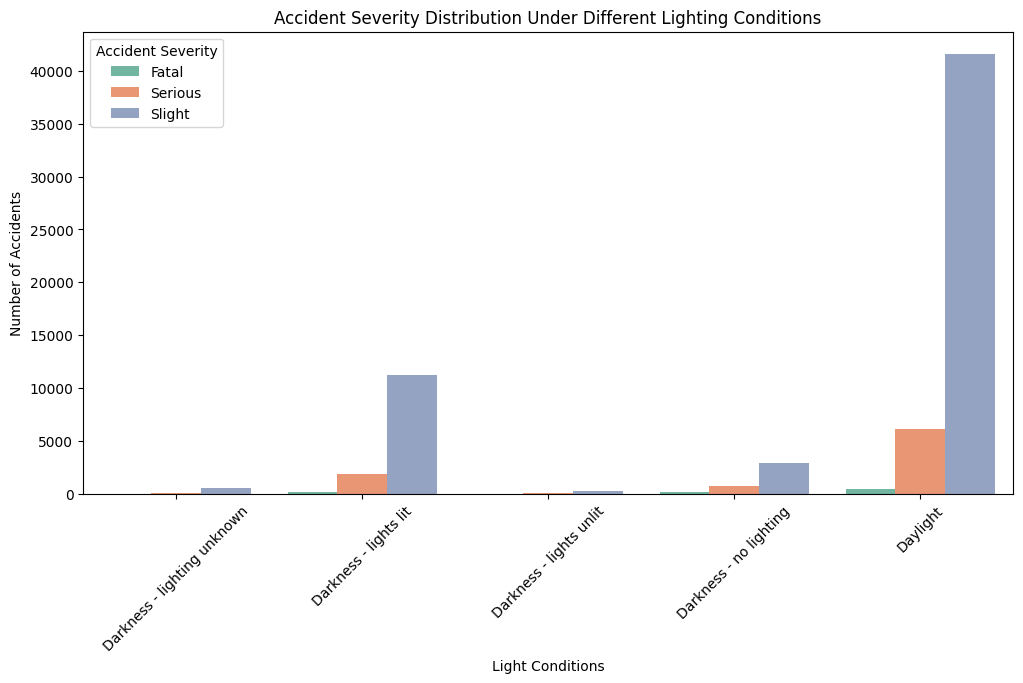

In [53]:
severity_light_df = severity_light.reset_index()
severity_light_df.columns = ["Accident_Severity", "Light_Conditions", "Count"]

plt.figure(figsize=(12, 6))

sns.barplot(
    data=severity_light_df,
    x="Light_Conditions",
    y="Count",
    hue="Accident_Severity",
    palette="Set2",
)

plt.xlabel("Light Conditions")
plt.ylabel("Number of Accidents")
plt.title("Accident Severity Distribution Under Different Lighting Conditions")
plt.xticks(rotation=45)
plt.legend(title="Accident Severity")

plt.show()

<h1>Insight 7. Well-lit areas (Darkness - lights lit) saw a large number of accidents, while No lighting areas had fewer but more severe accidents 147 fatal accidents</h1>

<h1>Question 8. Which district has the most accidents in well-lit darkness?</h1>

In [50]:
well_lit_darkness = acci_2021[acci_2021['Light_Conditions'] == 'Darkness - lights lit']

district_well_lit_accidents = well_lit_darkness.groupby('District Area').size().reset_index(name='Accident_Count')

district_well_lit_accidents = district_well_lit_accidents.sort_values(by='Accident_Count', ascending=False)

district_well_lit_accidents

,District Area,Accident_Count
24,Birmingham,364
195,Leeds,204
208,Manchester,192
147,Glasgow City,179
36,Bradford,164
...,...,...
291,Rutland,0
63,Castle Morpeth,0
58,Caradon,0
22,Berwick-upon-Tweed,0


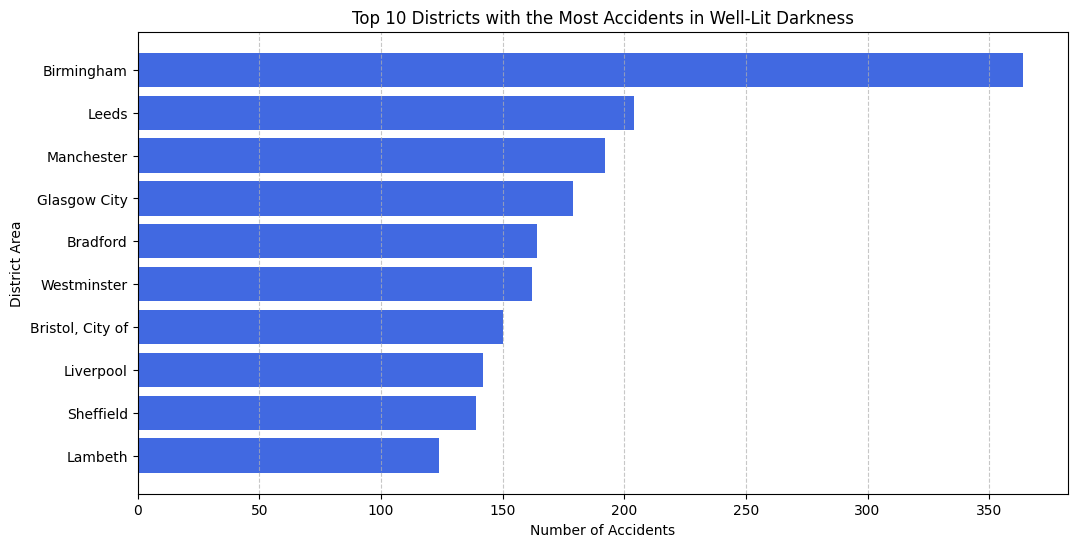

In [52]:
top_districts = district_well_lit_accidents.head(10)  # Select top 10 districts


plt.figure(figsize=(12, 6))
plt.barh(top_districts["District Area"], top_districts["Accident_Count"], color="royalblue")
plt.xlabel("Number of Accidents")
plt.ylabel("District Area")
plt.title("Top 10 Districts with the Most Accidents in Well-Lit Darkness")
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.grid(axis="x", linestyle="--", alpha=0.7)


plt.show()

<h1>Insight 8. Birmingham has the highest number of accidents (364), Leeds (204) and Manchester (192) follow closely, Glasgow City (179) and Bradford (164), Some districts, like Rutland, Castle Morpeth, Caradon, and West Somerset, report zero accidents</h1>

<h1>Question 9. Do more severe accidents tend to have a higher number of casualties?</h1>

In [37]:
severity_casualty = acci_2021.groupby('Accident_Severity')['Number_of_Casualties'].sum()
severity_casualty

Accident_Severity
Fatal       1483
Serious    13002
Slight     74921
Name: Number_of_Casualties, dtype: int64

In [38]:
accidents_per_severity = acci_2021['Accident_Severity'].value_counts()

casualties_per_severity = acci_2021.groupby('Accident_Severity')['Number_of_Casualties'].sum()

avg_casualties_per_severity = casualties_per_severity / accidents_per_severity

avg_casualties_per_severity

Accident_Severity
Fatal      1.801944
Serious    1.467826
Slight     1.326247
dtype: float64

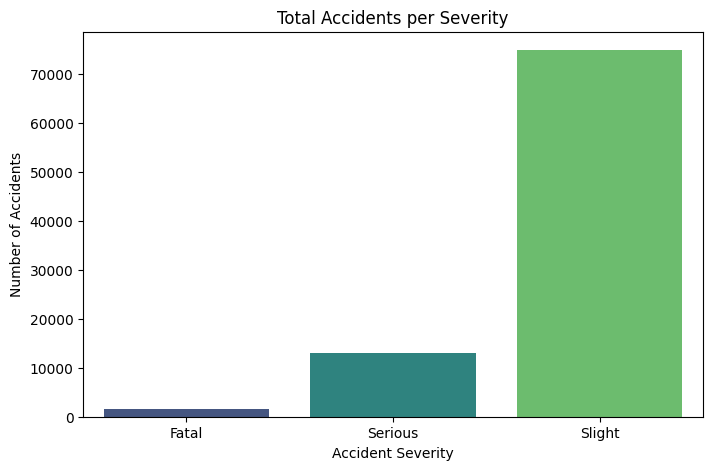

In [39]:
accidents_per_severity = severity_casualty

plt.figure(figsize=(8, 5))
sns.barplot(x=accidents_per_severity.index, y=accidents_per_severity.values, palette="viridis")

plt.title("Total Accidents per Severity",)
plt.xlabel("Accident Severity",)
plt.ylabel("Number of Accidents",)
plt.show()

<h1>Insight 9. Fatal accidents have the highest average casualties per accident (1.80 casualties per accident), Serious accidents have an average of 1.47 casualties per accident, Slight accidents have the lowest average casualties per accident (1.32 casualties per accident). in conclusion, The severity of an accident correlates with the number of casualties. Fatal and serious accidents tend to involve more people, making them a greater concern for road safety interventions.</h1>

<h1>Question 10. Does the severity of accidents vary by month? Are certain months more prone to fatal or serious accidents?</h1>

In [40]:
severity_month = acci_2021.groupby(['Month', 'Accident_Severity']).size().unstack()
severity_month

Accident_Severity,Fatal,Serious,Slight
Month,,,
1.0,66,582,3897
2.0,61,588,4389
3.0,68,663,4469
4.0,84,731,4128
5.0,63,763,4439
6.0,62,763,4803
7.0,68,791,4796
8.0,79,757,4373
9.0,63,831,4755


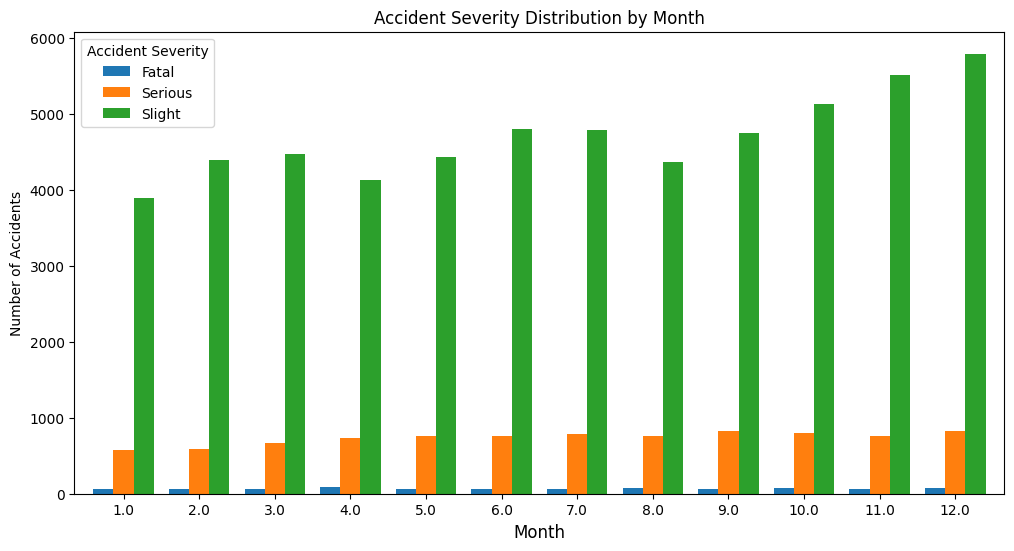

In [41]:
severity_month = acci_2021.groupby(['Month', 'Accident_Severity']).size().unstack()
severity_month.plot(kind='bar', figsize=(12, 6), width=0.8)

plt.title("Accident Severity Distribution by Month",)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Accidents",)
plt.xticks(rotation=0)
plt.legend(title="Accident Severity")

month_names = {
    1.0: 'January', 2.0: 'February', 
    3.0: 'March', 4.0: 'April', 5.0: 'May', 
    6.0: 'june', 7.0: 'July', 8.0: 'August', 
    9.0: 'September', 10.0: 'October', 11.0: 'November', 
    12.0: 'December'
}
severity_month.index = severity_month.index.map(month_names)

plt.show()

<h1>Insight 10. Serious accidents are generally higher from April (731) to December (822), Slight accidents make up the majority of incidents in every month (80%+ consistently). December, despite having the highest number of accidents, has a lower fatality rate (1.09%) compared to other months.</h1>

<h1>Multi Variate</h1>

<h1>Question 11. Do certain districts have higher accident severity during specific light conditions?</h1>

In [42]:
district_severity_light = acci_2021.groupby(['District Area', 'Accident_Severity', 'Light_Conditions']).size().reset_index(name='Count')
district_severity_light

,District Area,Accident_Severity,Light_Conditions,Count
0,Aberdeen City,Fatal,Darkness - lighting unknown,0
1,Aberdeen City,Fatal,Darkness - lights lit,0
2,Aberdeen City,Fatal,Darkness - lights unlit,0
3,Aberdeen City,Fatal,Darkness - no lighting,0
4,Aberdeen City,Fatal,Daylight,0
...,...,...,...,...
6325,York,Slight,Darkness - lighting unknown,1
6326,York,Slight,Darkness - lights lit,39
6327,York,Slight,Darkness - lights unlit,3
6328,York,Slight,Darkness - no lighting,9


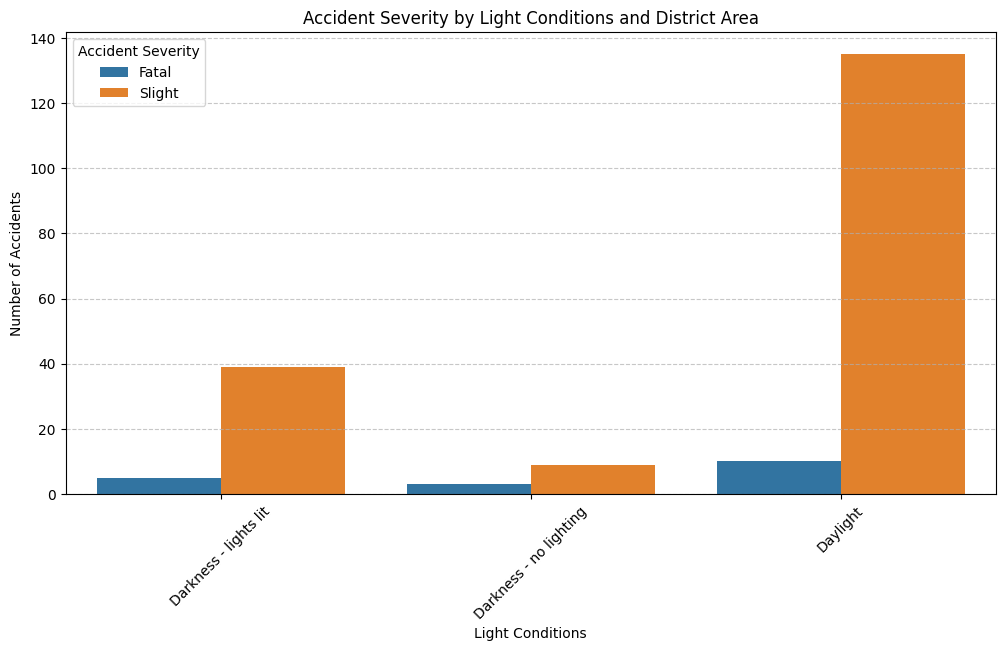

In [43]:
# Sample data structure based on the provided table
data = {
    "District Area": ["Aberdeen City", "Aberdeen City", "Aberdeen City", "York", "York", "York"],
    "Accident_Severity": ["Fatal", "Fatal", "Fatal", "Slight", "Slight", "Slight"],
    "Light_Conditions": ["Darkness - lights lit", "Darkness - no lighting", "Daylight", "Darkness - lights lit", "Darkness - no lighting", "Daylight"],
    "Count": [5, 3, 10, 39, 9, 135]
}

# Creating a DataFrame
df = pd.DataFrame(data)

# Plotting a grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x="Light_Conditions", y="Count", hue="Accident_Severity", data=df)

# Labels and title
plt.xlabel("Light Conditions")
plt.ylabel("Number of Accidents")
plt.title("Accident Severity by Light Conditions and District Area")
plt.xticks(rotation=45)
plt.legend(title="Accident Severity")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

<h1>Insight 11. Urban districts may have more accidents in well-lit conditions. Due to better street lighting, urban areas might have more slight accidents at night compared to rural areas. Rural districts may have more severe accidents in darkness.</h1>

<h1>Question 12 </h1>

In [44]:
year_area = accident.groupby(['District Area', 'Year']).size().reset_index(name = 'Accident Count')

easy_df = year_area.pivot(index='Year', columns='District Area', values='Accident Count')
easy_df

District Area,Aberdeen City,Aberdeenshire,Adur,Allerdale,Alnwick,Amber Valley,Angus,Argyll and Bute,Arun,Ashfield,...,Wokingham,Wolverhampton,Worcester,Worthing,Wrexham,Wychavon,Wycombe,Wyre,Wyre Forest,York
Year,,,,,,,,,,,,,,,,,,,,,
2019.0,134,201,75,115,52,146,120,120,129,158,...,162,273,92,109,132,135,170,127,97,194
2020.0,203,299,78,138,46,137,116,109,135,145,...,153,259,85,101,156,177,190,124,95,172
2021.0,204,257,66,111,9,129,94,110,152,139,...,125,255,92,111,126,138,171,130,96,215
2022.0,0,0,46,79,0,107,0,0,139,104,...,101,214,82,82,120,101,164,115,93,171


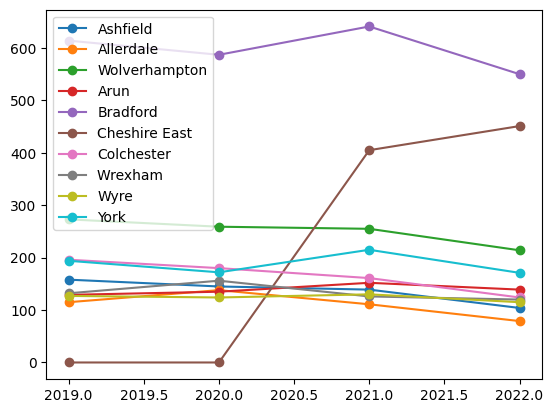

In [47]:
year_area = accident.groupby(['District Area', 'Year']).size().reset_index(name = 'Accident Count')

easy_df = year_area.pivot(index='Year', columns='District Area', values='Accident Count')

plt.plot(easy_df.index, easy_df['Ashfield'], label='Ashfield', marker='o')
plt.plot(easy_df.index, easy_df['Allerdale'], label='Allerdale', marker='o')
plt.plot(easy_df.index, easy_df['Wolverhampton'], label='Wolverhampton', marker='o')
plt.plot(easy_df.index, easy_df['Arun'], label='Arun', marker='o')
plt.plot(easy_df.index, easy_df['Bradford'], label='Bradford', marker='o')
plt.plot(easy_df.index, easy_df['Cheshire East'], label='Cheshire East', marker='o')
plt.plot(easy_df.index, easy_df['Colchester'], label='Colchester', marker='o')
plt.plot(easy_df.index, easy_df['Wrexham'], label='Wrexham  ', marker='o')
plt.plot(easy_df.index, easy_df['Wyre'], label='Wyre', marker='o')
plt.plot(easy_df.index, easy_df['York'], label='York', marker='o')


plt.legend()
plt.show()

<h1>Insight</h1>

<h1>Question 13 Which light condition has the highest casualties per accident?</h1>

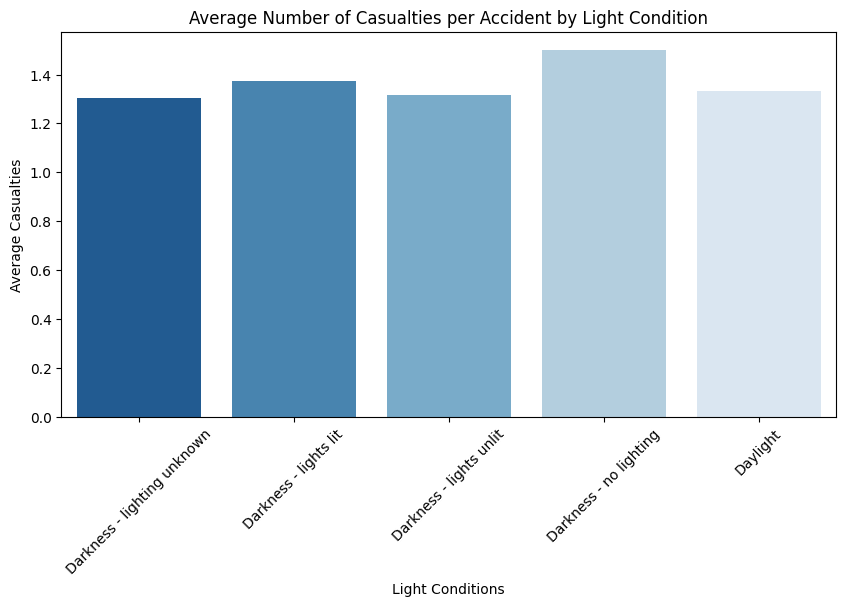

In [54]:
casualty_light = acci_2021.groupby('Light_Conditions')['Number_of_Casualties'].mean().reset_index()

# Visualization
plt.figure(figsize=(10, 5))
sns.barplot(x='Light_Conditions', y='Number_of_Casualties', data=casualty_light, palette="Blues_r")
plt.title("Average Number of Casualties per Accident by Light Condition")
plt.xlabel("Light Conditions")
plt.ylabel("Average Casualties")
plt.xticks(rotation=45)
plt.show()

<h1>insight .</h1>

<h1>question .</h1>

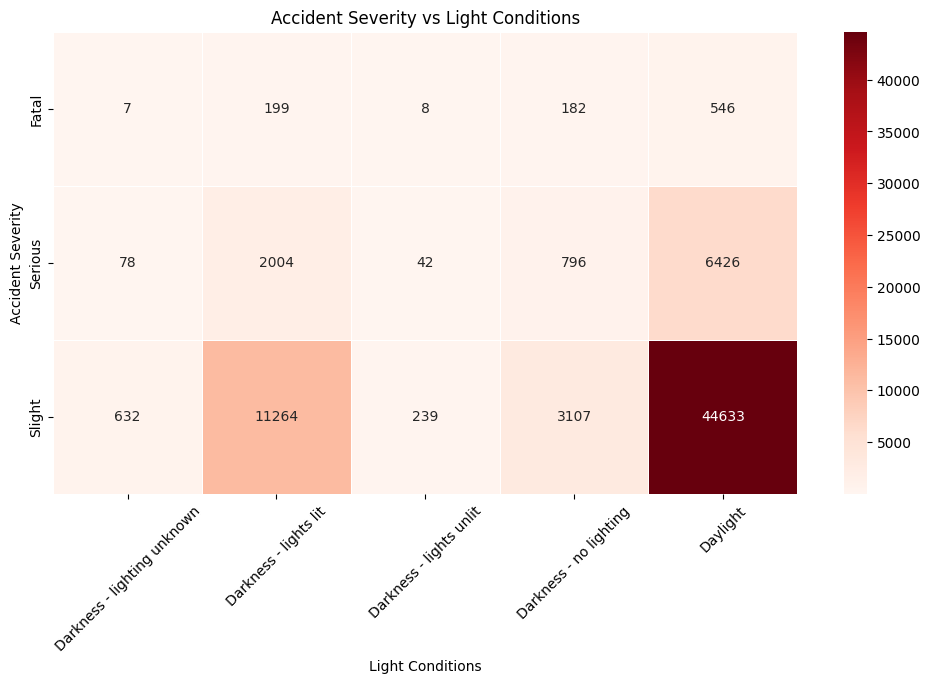

In [57]:
severity_light = acci_2020.groupby(['Accident_Severity', 'Light_Conditions']).size().reset_index(name='Count')

pivot_data = severity_light.pivot(index='Accident_Severity', columns='Light_Conditions', values='Count')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_data, annot=True, fmt=".0f", cmap="Reds", linewidths=0.5)
plt.title("Accident Severity vs Light Conditions")
plt.xlabel("Light Conditions")
plt.ylabel("Accident Severity")
plt.xticks(rotation=45)
plt.show()